In [133]:
import numpy as np
import math
from numpy import linalg as LA

sigma = 10
beta = 8 / 3
rho = 28

x = 0
y = 0
z = 0
Df_Dx1 = np.array([[-sigma, sigma, 0],[rho-z, -1, -x ],[y, x , -beta]])
print(LA.eig(Df_Dx1))

x = math.sqrt(72)
y = math.sqrt(72)
z = 27
Df_Dx2 = np.array([[-sigma, sigma, 0],[rho-z, -1, -x ],[y, x , -beta]])
print(LA.eig(Df_Dx2))

x = -math.sqrt(72)
y = -math.sqrt(72)
z = 27
Df_Dx3 = np.array([[-sigma, sigma, 0],[rho-z, -1, -x ],[y, x , -beta]])
print(LA.eig(Df_Dx3))

(array([-22.82772345,  11.82772345,  -2.66666667]), array([[-0.61481679, -0.41650418,  0.        ],
       [ 0.78866997, -0.9091338 ,  0.        ],
       [ 0.        ,  0.        ,  1.        ]]))
(array([-13.85457791 +0.j        ,   0.09395562+10.19450522j,
         0.09395562-10.19450522j]), array([[ 0.85566502+0.j        , -0.26611932-0.29501017j,
        -0.26611932+0.29501017j],
       [-0.32982275+0.j        ,  0.03212861-0.56907743j,
         0.03212861+0.56907743j],
       [-0.39881615+0.j        , -0.71921356+0.j        ,
        -0.71921356-0.j        ]]))
(array([-13.85457791 +0.j        ,   0.09395562+10.19450522j,
         0.09395562-10.19450522j]), array([[ 0.85566502+0.j        , -0.26611932-0.29501017j,
        -0.26611932+0.29501017j],
       [-0.32982275+0.j        ,  0.03212861-0.56907743j,
         0.03212861+0.56907743j],
       [ 0.39881615+0.j        ,  0.71921356+0.j        ,
         0.71921356-0.j        ]]))


In [134]:
sigma = 10
beta = 8 / 3
Df_Dx_list = []
rho_m = np.arange(5, 55, 5)
fix_pts = [[0, 0, 0], [math.sqrt(72), math.sqrt(72), 27], [-math.sqrt(72), -math.sqrt(72), 27]]

for fix_pt in fix_pts:
    for i, rho in enumerate(rho_m):
        print("fix pt ",fix_pt, "rho ", rho)
        Df_Dx = [[-sigma, sigma, 0],[rho-fix_pt[2], -1, -fix_pt[0] ],[fix_pt[1], fix_pt[0], -beta]]
        u, v = LA.eig(Df_Dx)
        print("eigenvalue ", u, "\n")

fix pt  [0, 0, 0] rho  5
eigenvalue  [-13.88152731   2.88152731  -2.66666667] 

fix pt  [0, 0, 0] rho  10
eigenvalue  [-16.4658561    5.4658561   -2.66666667] 

fix pt  [0, 0, 0] rho  15
eigenvalue  [-18.54798835   7.54798835  -2.66666667] 

fix pt  [0, 0, 0] rho  20
eigenvalue  [-20.34082208   9.34082208  -2.66666667] 

fix pt  [0, 0, 0] rho  25
eigenvalue  [-21.93928222  10.93928222  -2.66666667] 

fix pt  [0, 0, 0] rho  30
eigenvalue  [-23.39553017  12.39553017  -2.66666667] 

fix pt  [0, 0, 0] rho  35
eigenvalue  [-24.7418814   13.7418814   -2.66666667] 

fix pt  [0, 0, 0] rho  40
eigenvalue  [-26.          15.          -2.66666667] 

fix pt  [0, 0, 0] rho  45
eigenvalue  [-27.18524844  16.18524844  -2.66666667] 

fix pt  [0, 0, 0] rho  50
eigenvalue  [-28.30898946  17.30898946  -2.66666667] 

fix pt  [8.48528137423857, 8.48528137423857, 27] rho  5
eigenvalue  [-3.22822306+16.56380116j -3.22822306-16.56380116j
 -7.21022055 +0.j        ] 

fix pt  [8.48528137423857, 8.48528137423857

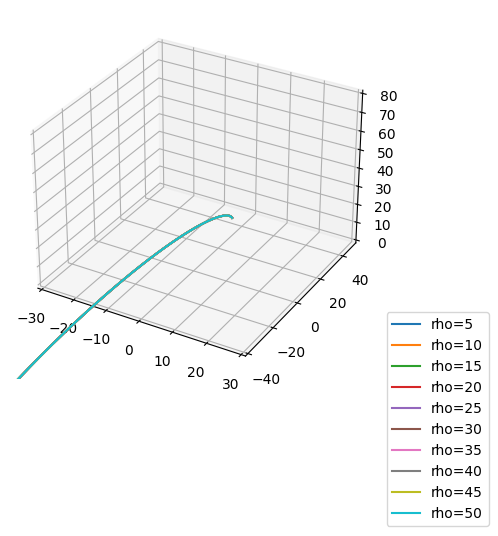

In [135]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import solve_ivp

# Lorenz's parameters (chaotic)
sigma = 10
beta = 8 / 3
rho_m = np.arange(5, 55, 5)

# Initial condition
y0 = [10, 10, 10]

# fixed points
fix_pts = [[0, 0, 0], 
           [math.sqrt(72), math.sqrt(72), 27], 
           [-math.sqrt(72), -math.sqrt(72), 27]]

# Compute trajectory 
dt = 0.01
T = 20
num_time_pts = int(T / dt)
t = np.linspace(0, T, num_time_pts)
ax = plt.figure().add_subplot(projection='3d')  # make a 3D plot
l = []

# linearized_function
fix_pt = fix_pts[1]
Df_Dx = np.array([[-sigma, sigma, 0],
                  [rho-fix_pt[2], -1, -fix_pt[0]],
                  [fix_pt[1], fix_pt[0], -beta]])
def linearized_function(t, y):
    return Df_Dx @ y # A @ y

for i, rho in enumerate(rho_m):
    linearized_solution = solve_ivp(linearized_function, (0, T), fix_pt, t_eval=t)
    t = linearized_solution.t
    y = linearized_solution.y.T
    ax.plot(y[:, 0], y[:, 1], y[:, 2])
    l.append("rho={}".format(rho))
ax.axes.set_xlim3d(left=-30, right=30) 
ax.axes.set_ylim3d(bottom=-40, top=50) 
ax.axes.set_zlim3d(bottom=0, top=80) 
plt.legend(l, bbox_to_anchor=(1.0, 0.2), loc="upper left")
plt.show()

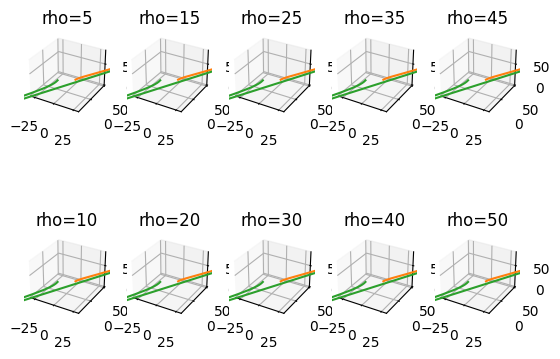

In [136]:
import numpy as np
import math
from matplotlib import pyplot as plt
from scipy.integrate import solve_ivp

# Lorenz's parameters (chaotic)
sigma = 10
beta = 8 / 3
rho_m = np.arange(5, 55, 5)

# Initial condition
y0 = [10, 10, 10]

# fixed points
fix_pts = [[0, 0, 0], 
           [math.sqrt(72), math.sqrt(72), 27], 
           [-math.sqrt(72), -math.sqrt(72), 27]]

# Compute trajectory 
dt = 0.01
T = 20
num_time_pts = int(T / dt)
t = np.linspace(0, T, num_time_pts)

# linearized_function
fix_pt = fix_pts[0]
Df_Dx = np.array([[-sigma, sigma, 0],
                  [rho-fix_pt[2], -1, -fix_pt[0]],
                  [fix_pt[1], fix_pt[0], -beta]])
def linearized_function(t, y):
    return Df_Dx @ y # A @ y

fig, axs = plt.subplots(2, 5, subplot_kw={'projection': '3d'})  # make a 3D plot
for i, rho in enumerate(rho_m):
    for fix_pt in fix_pts:
        lorenz_solution = solve_ivp(linearized_function, (0, T), fix_pt, t_eval=t)
        t = lorenz_solution.t
        y = lorenz_solution.y.T
        row = (i) % 2
        col = (i) // 2
        axs[row, col].plot(y[:, 0], y[:, 1], y[:, 2])
        axs[row, col].set_title("rho={}".format(rho))
        axs[row, col].set_xlim3d(left=-30, right=30) 
        axs[row, col].set_ylim3d(bottom=-40, top=50) 
        axs[row, col].set_zlim3d(bottom=0, top=80) 
plt.show()

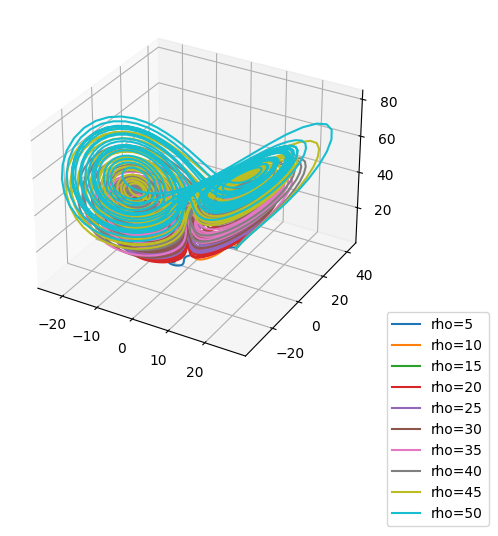

In [137]:
"""
This part of code is partially referenced from L18_simulateLORENZ.ipynb
Modeified by Henry Chang
"""
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import solve_ivp

def lorenz(t, y):
    # y is a three dimensional state-vector
    dy = [sigma * (y[1] - y[0]), 
          y[0] * (rho - y[2]) - y[1],
          y[0] * y[1] - beta * y[2]]
    return np.array(dy)

# Lorenz's parameters (chaotic)
sigma = 10
beta = 8 / 3
rho_m = np.arange(5, 55, 5)

# Initial condition
y0 = [10, 10, 10]

# Compute trajectory 
dt = 0.01
T = 20
num_time_pts = int(T / dt)
t = np.linspace(0, T, num_time_pts)
ax = plt.figure().add_subplot(projection='3d')  # make a 3D plot
l = []
for i, rho in enumerate(rho_m):
    lorenz_solution = solve_ivp(lorenz, (0, T), y0, t_eval=t)
    t = lorenz_solution.t
    y = lorenz_solution.y.T
    plt.plot(y[:, 0], y[:, 1], y[:, 2])
    l.append("rho={}".format(rho))
plt.legend(l, bbox_to_anchor=(1.0, 0.2), loc="upper left")
plt.show()

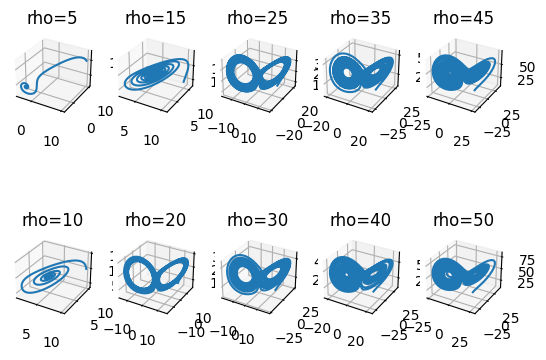

In [138]:
"""
This part of code is partially referenced from L18_simulateLORENZ.ipynb
Modeified by Henry Chang
"""
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import solve_ivp

def lorenz(t, y):
    # y is a three dimensional state-vector
    dy = [sigma * (y[1] - y[0]), 
          y[0] * (rho - y[2]) - y[1],
          y[0] * y[1] - beta * y[2]]
    return np.array(dy)

# Lorenz's parameters (chaotic)
sigma = 10
beta = 8 / 3
rho_m = np.arange(5, 55, 5)

# Initial condition
y0 = [10, 10, 10]

# Compute trajectory 
dt = 0.01
T = 20
num_time_pts = int(T / dt)
t = np.linspace(0, T, num_time_pts)
fig, axs = plt.subplots(2, 5, subplot_kw={'projection': '3d'})  # make a 3D plot
for i, rho in enumerate(rho_m):
    lorenz_solution = solve_ivp(lorenz, (0, T), y0, t_eval=t)
    t = lorenz_solution.t
    y = lorenz_solution.y.T
    row = (i) % 2
    col = (i) // 2
    axs[row, col].plot(y[:, 0], y[:, 1], y[:, 2])
    axs[row, col].set_title("rho={}".format(rho))
plt.show()

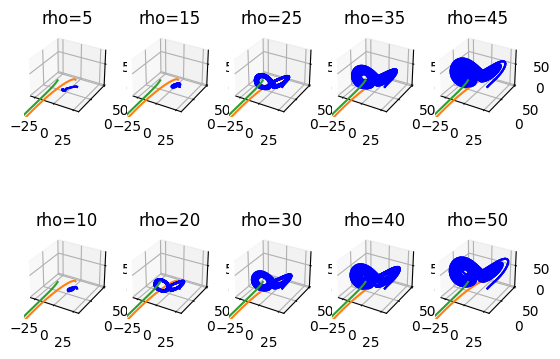

In [139]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import solve_ivp

def lorenz(t, y):
    # y is a three dimensional state-vector
    dy = [sigma * (y[1] - y[0]), 
          y[0] * (rho - y[2]) - y[1],
          y[0] * y[1] - beta * y[2]]
    return np.array(dy)

# fixed points
fix_pts = [[0, 0, 0], 
           [math.sqrt(72), math.sqrt(72), 27], 
           [-math.sqrt(72), -math.sqrt(72), 27]]

# linearized_function
fix_pt = fix_pts[1]
Df_Dx = np.array([[-sigma, sigma, 0],
                  [rho-fix_pt[2], -1, -fix_pt[0]],
                  [fix_pt[1], fix_pt[0], -beta]])
def linearized_function(t, y):
    return Df_Dx @ y # A @ y
    
# Lorenz's parameters (chaotic)
sigma = 10
beta = 8 / 3
rho_m = np.arange(5, 55, 5)

# Initial condition
y0 = [10, 10, 10]

# Compute trajectory 
dt = 0.01
T = 20
num_time_pts = int(T / dt)
t = np.linspace(0, T, num_time_pts)
fig, axs = plt.subplots(2, 5, subplot_kw={'projection': '3d'})  # make a 3D plot
for i, rho in enumerate(rho_m):
    for fix_pt in fix_pts:
        lorenz_solution = solve_ivp(lorenz, (0, T), y0, t_eval=t)
        linearized_solution = solve_ivp(linearized_function, (0, T), fix_pt, t_eval=t)
        t = lorenz_solution.t
        y = lorenz_solution.y.T
        yl = linearized_solution.y.T
        row = (i) % 2
        col = (i) // 2
        axs[row, col].plot(y[:, 0], y[:, 1], y[:, 2], 'blue')
        axs[row, col].plot(yl[:, 0], yl[:, 1], yl[:, 2])
        axs[row, col].set_title("rho={}".format(rho))
        axs[row, col].set_xlim3d(left=-30, right=30) 
        axs[row, col].set_ylim3d(bottom=-40, top=50) 
        axs[row, col].set_zlim3d(bottom=0, top=80) 
plt.show()